In [1]:
import tensorflow as tf
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3761 files belonging to 7 classes.


In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3762 files belonging to 7 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 85.         43.         21.       ]
   [ 83.37891    41.98047    19.980469 ]
   [ 95.11984    51.119843   25.51828  ]
   ...
   [ 67.90234    29.902344   16.902344 ]
   [ 59.59378    25.59378    15.5937805]
   [ 53.         23.         12.       ]]

  [[ 87.27347    45.273468   23.273468 ]
   [ 86.         44.         20.       ]
   [ 86.69141    44.10547    20.300781 ]
   ...
   [ 76.43735    34.437347   20.437347 ]
   [ 75.80469    33.804688   19.804688 ]
   [ 72.46484    30.464844   18.464844 ]]

  [[101.01047    55.010468   29.010468 ]
   [101.00015    57.000153   28.000153 ]
   [105.30859    58.308594   30.308594 ]
   ...
   [ 88.306244   41.306244   23.306244 ]
   [ 86.         40.         24.       ]
   [ 81.997345   35.997345   19.997345 ]]

  ...

  [[ 41.348907   80.385315  109.39328  ]
   [ 45.90204    75.90204   103.90204  ]
   [ 33.603912   68.99765   105.30078  ]
   ...
   [212.40625   228.51642   238.22891  ]
   [ 20.027954   41.899353   80.914825 ]
   [ 

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\Ananya\Documents\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1024,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
model.add(Dense(units=7,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,575 (26.01 MB)

 Trainable params: 6,817,575 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 523s 4s/step - accuracy: 0.3497 - loss: 1.9815 - val_accuracy: 0.4553 - val_loss: 1.3256
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 550s 4s/step - accuracy: 0.4595 - loss: 1.2675 - val_accuracy: 0.5550 - val_loss: 1.0615
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.5313 - loss: 1.1354 - val_accuracy: 0.5417 - val_loss: 1.0854
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 538s 5s/step - accuracy: 0.5464 - loss: 1.0962 - val_accuracy: 0.5872 - val_loss: 0.9787
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 532s 4s/step - accuracy: 0.5747 - loss: 1.0258 - val_accuracy: 0.6130 - val_loss: 0.9473
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 542s 4s/step - accuracy: 0.5767 - loss: 0.9884 - val_accuracy: 0.6005 - val_loss: 0.9870
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 513s 4s/step - accuracy: 0.6106 - loss: 0.9517 - val_accuracy: 0.6095 - val_loss: 0.9195
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.6096 - loss: 0.9374 - val_accu

In [21]:
train_loss,train_acc=model.evaluate(training_set)

118/118 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9201 - loss: 0.2186


In [22]:
print(train_loss,train_acc)

0.20348075032234192 0.926349401473999


In [23]:
valid_loss,valid_acc=model.evaluate(validation_set)

118/118 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9278 - loss: 0.2031


In [24]:
print(valid_loss,valid_acc)

0.20362810790538788 0.9263689517974854


In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.4049454927444458,
  0.4926881194114685,
  0.5386865139007568,
  0.5546396970748901,
  0.5737835764884949,
  0.5902685523033142,
  0.6046264171600342,
  0.6035628914833069,
  0.6163254380226135,
  0.6383940577507019,
  0.6391916871070862,
  0.6530178189277649,
  0.6612603068351746,
  0.6788088083267212,
  0.6889125108718872,
  0.7091199159622192,
  0.7370380163192749,
  0.7338473796844482,
  0.7668173313140869,
  0.7745280265808105,
  0.8112204074859619,
  0.8277053833007812,
  0.851369321346283,
  0.8574846982955933,
  0.8888593316078186,
  0.906141996383667,
  0.9189045429229736,
  0.9282105565071106,
  0.926349401473999,
  0.9284764528274536],
 'loss': [1.5419871807098389,
  1.208329677581787,
  1.1170060634613037,
  1.0819860696792603,
  1.0277200937271118,
  0.9760338664054871,
  0.9539807438850403,
  0.9584440588951111,
  0.9210432171821594,
  0.8865872025489807,
  0.8522119522094727,
  0.8334119319915771,
  0.7835376262664795,
  0.7665171027183533,
  0.73890864849

In [27]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['accuracy']

[0.4049454927444458,
 0.4926881194114685,
 0.5386865139007568,
 0.5546396970748901,
 0.5737835764884949,
 0.5902685523033142,
 0.6046264171600342,
 0.6035628914833069,
 0.6163254380226135,
 0.6383940577507019,
 0.6391916871070862,
 0.6530178189277649,
 0.6612603068351746,
 0.6788088083267212,
 0.6889125108718872,
 0.7091199159622192,
 0.7370380163192749,
 0.7338473796844482,
 0.7668173313140869,
 0.7745280265808105,
 0.8112204074859619,
 0.8277053833007812,
 0.851369321346283,
 0.8574846982955933,
 0.8888593316078186,
 0.906141996383667,
 0.9189045429229736,
 0.9282105565071106,
 0.926349401473999,
 0.9284764528274536]

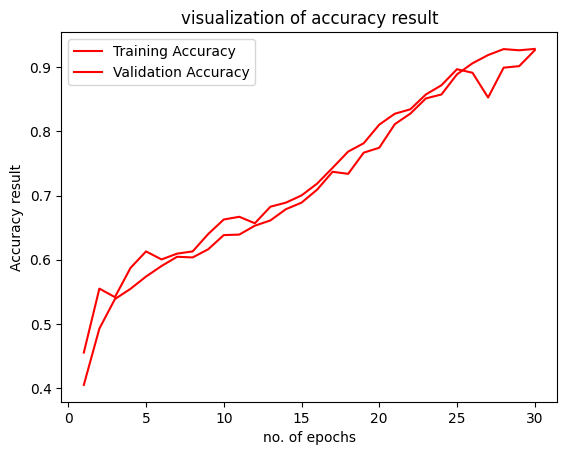

In [30]:
import matplotlib.pyplot as plt
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("Accuracy result")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

In [31]:
class_name=validation_set.class_names
class_name

['Healthy rice',
 '_BrownSpot',
 '_Healthy rice',
 '_Hispa',
 '_LeafBlast',
 'septoria',
 'stripe_rust']

In [33]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3762 files belonging to 7 classes.


In [34]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 658ms/step


(array([[9.8461491e-01, 1.2497526e-05, 3.2937592e-03, ..., 7.5874314e-06,
         1.0976178e-02, 1.0181117e-03],
        [9.9217939e-01, 1.0712199e-06, 5.1573767e-07, ..., 1.0060387e-06,
         6.2479484e-07, 7.8171855e-03],
        [9.9984515e-01, 5.4413245e-08, 2.4500375e-06, ..., 7.4942014e-05,
         2.8200790e-07, 7.4766336e-05],
        ...,
        [3.1240196e-18, 2.4313423e-14, 1.4527127e-22, ..., 4.2360944e-15,
         1.0117882e-14, 1.0000000e+00],
        [1.8831000e-07, 3.1256256e-12, 5.8316596e-15, ..., 1.6150157e-12,
         1.8669686e-13, 9.9999976e-01],
        [2.2024597e-13, 4.0178490e-12, 4.1915167e-17, ..., 6.7236716e-14,
         6.7793800e-14, 1.0000000e+00]], dtype=float32),
 (3762, 7))

In [35]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(3762,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], dtype=int64)>

In [37]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(3762, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(3762,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], dtype=int64)>

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

 Healthy rice       0.99      1.00      1.00       102
   _BrownSpot       0.91      0.97      0.94       523
_Healthy rice       0.90      0.96      0.93      1488
       _Hispa       0.95      0.77      0.85       565
   _LeafBlast       0.95      0.91      0.93       779
     septoria       1.00      0.98      0.99        97
  stripe_rust       1.00      1.00      1.00       208

     accuracy                           0.93      3762
    macro avg       0.96      0.94      0.95      3762
 weighted avg       0.93      0.93      0.93      3762



In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_true,predicted_categories)
cm.shape

(7, 7)

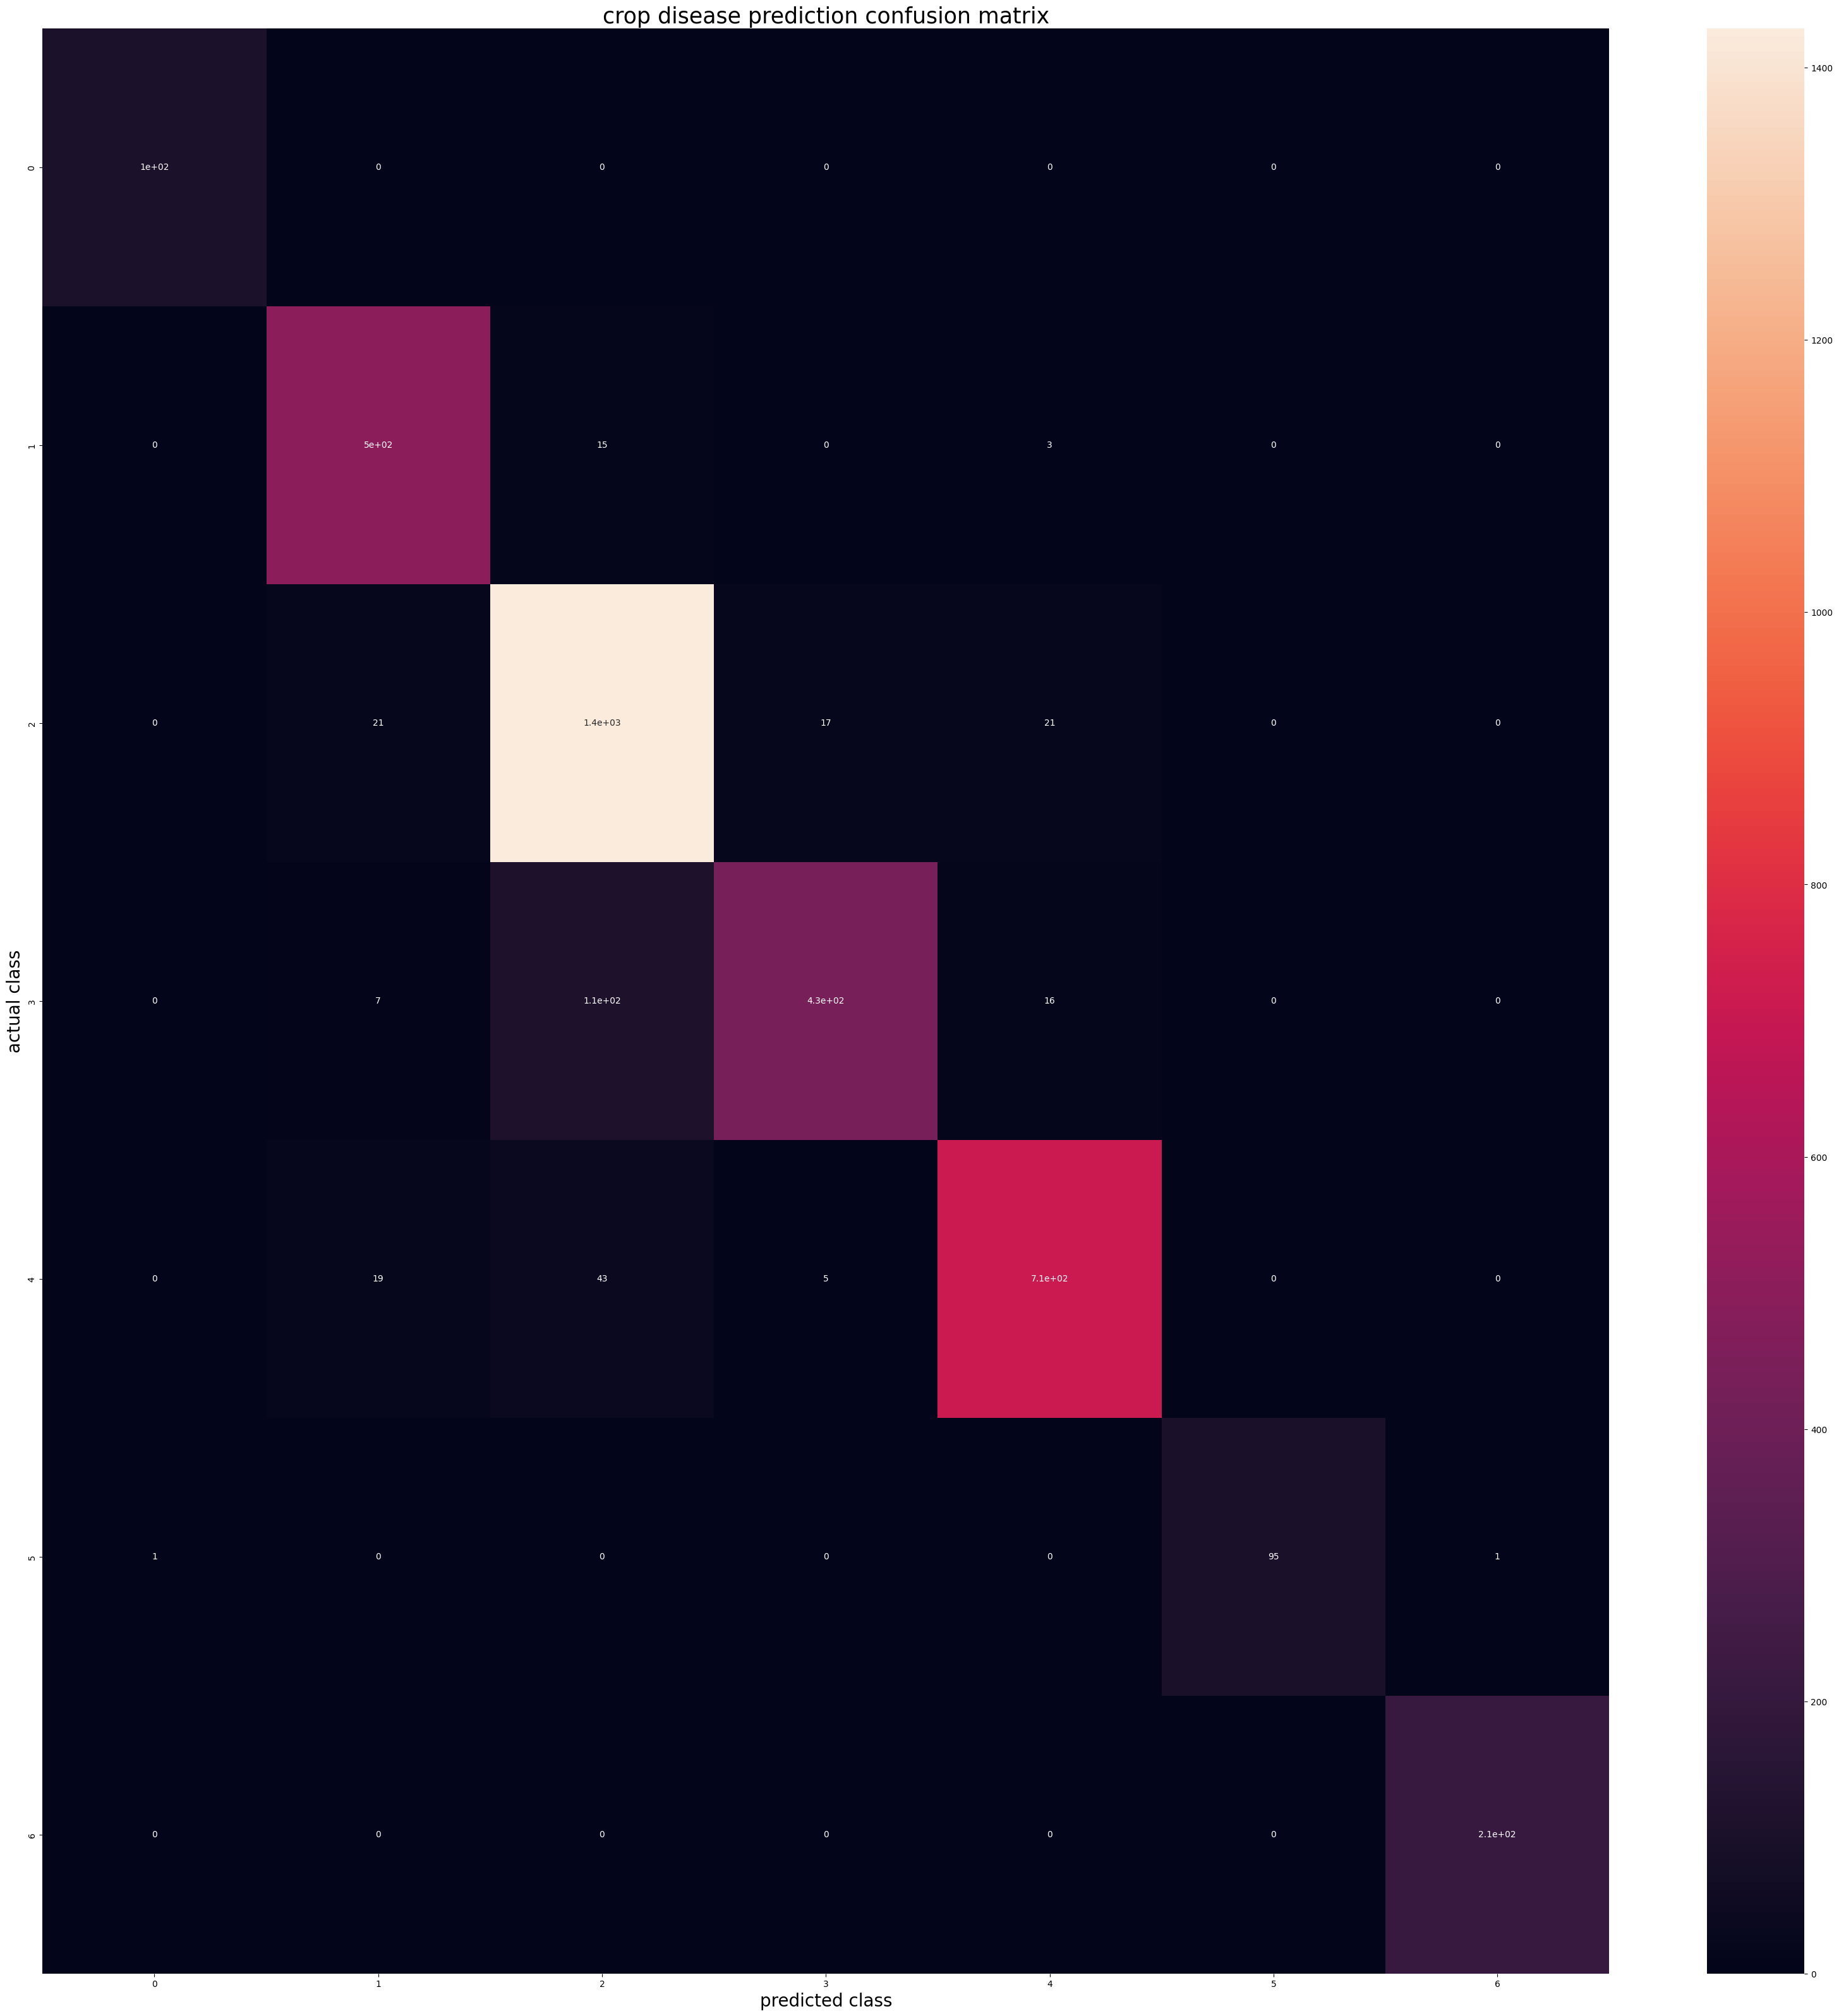

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("crop disease prediction confusion matrix",fontsize=25)
plt.show()